# 이항검정

In [14]:
# 이항검정
# 9.5.1 연습문제 

# 1. 
N = 10
n = 1

sp.stats.binom_test(n, N)


0.021484374999999997

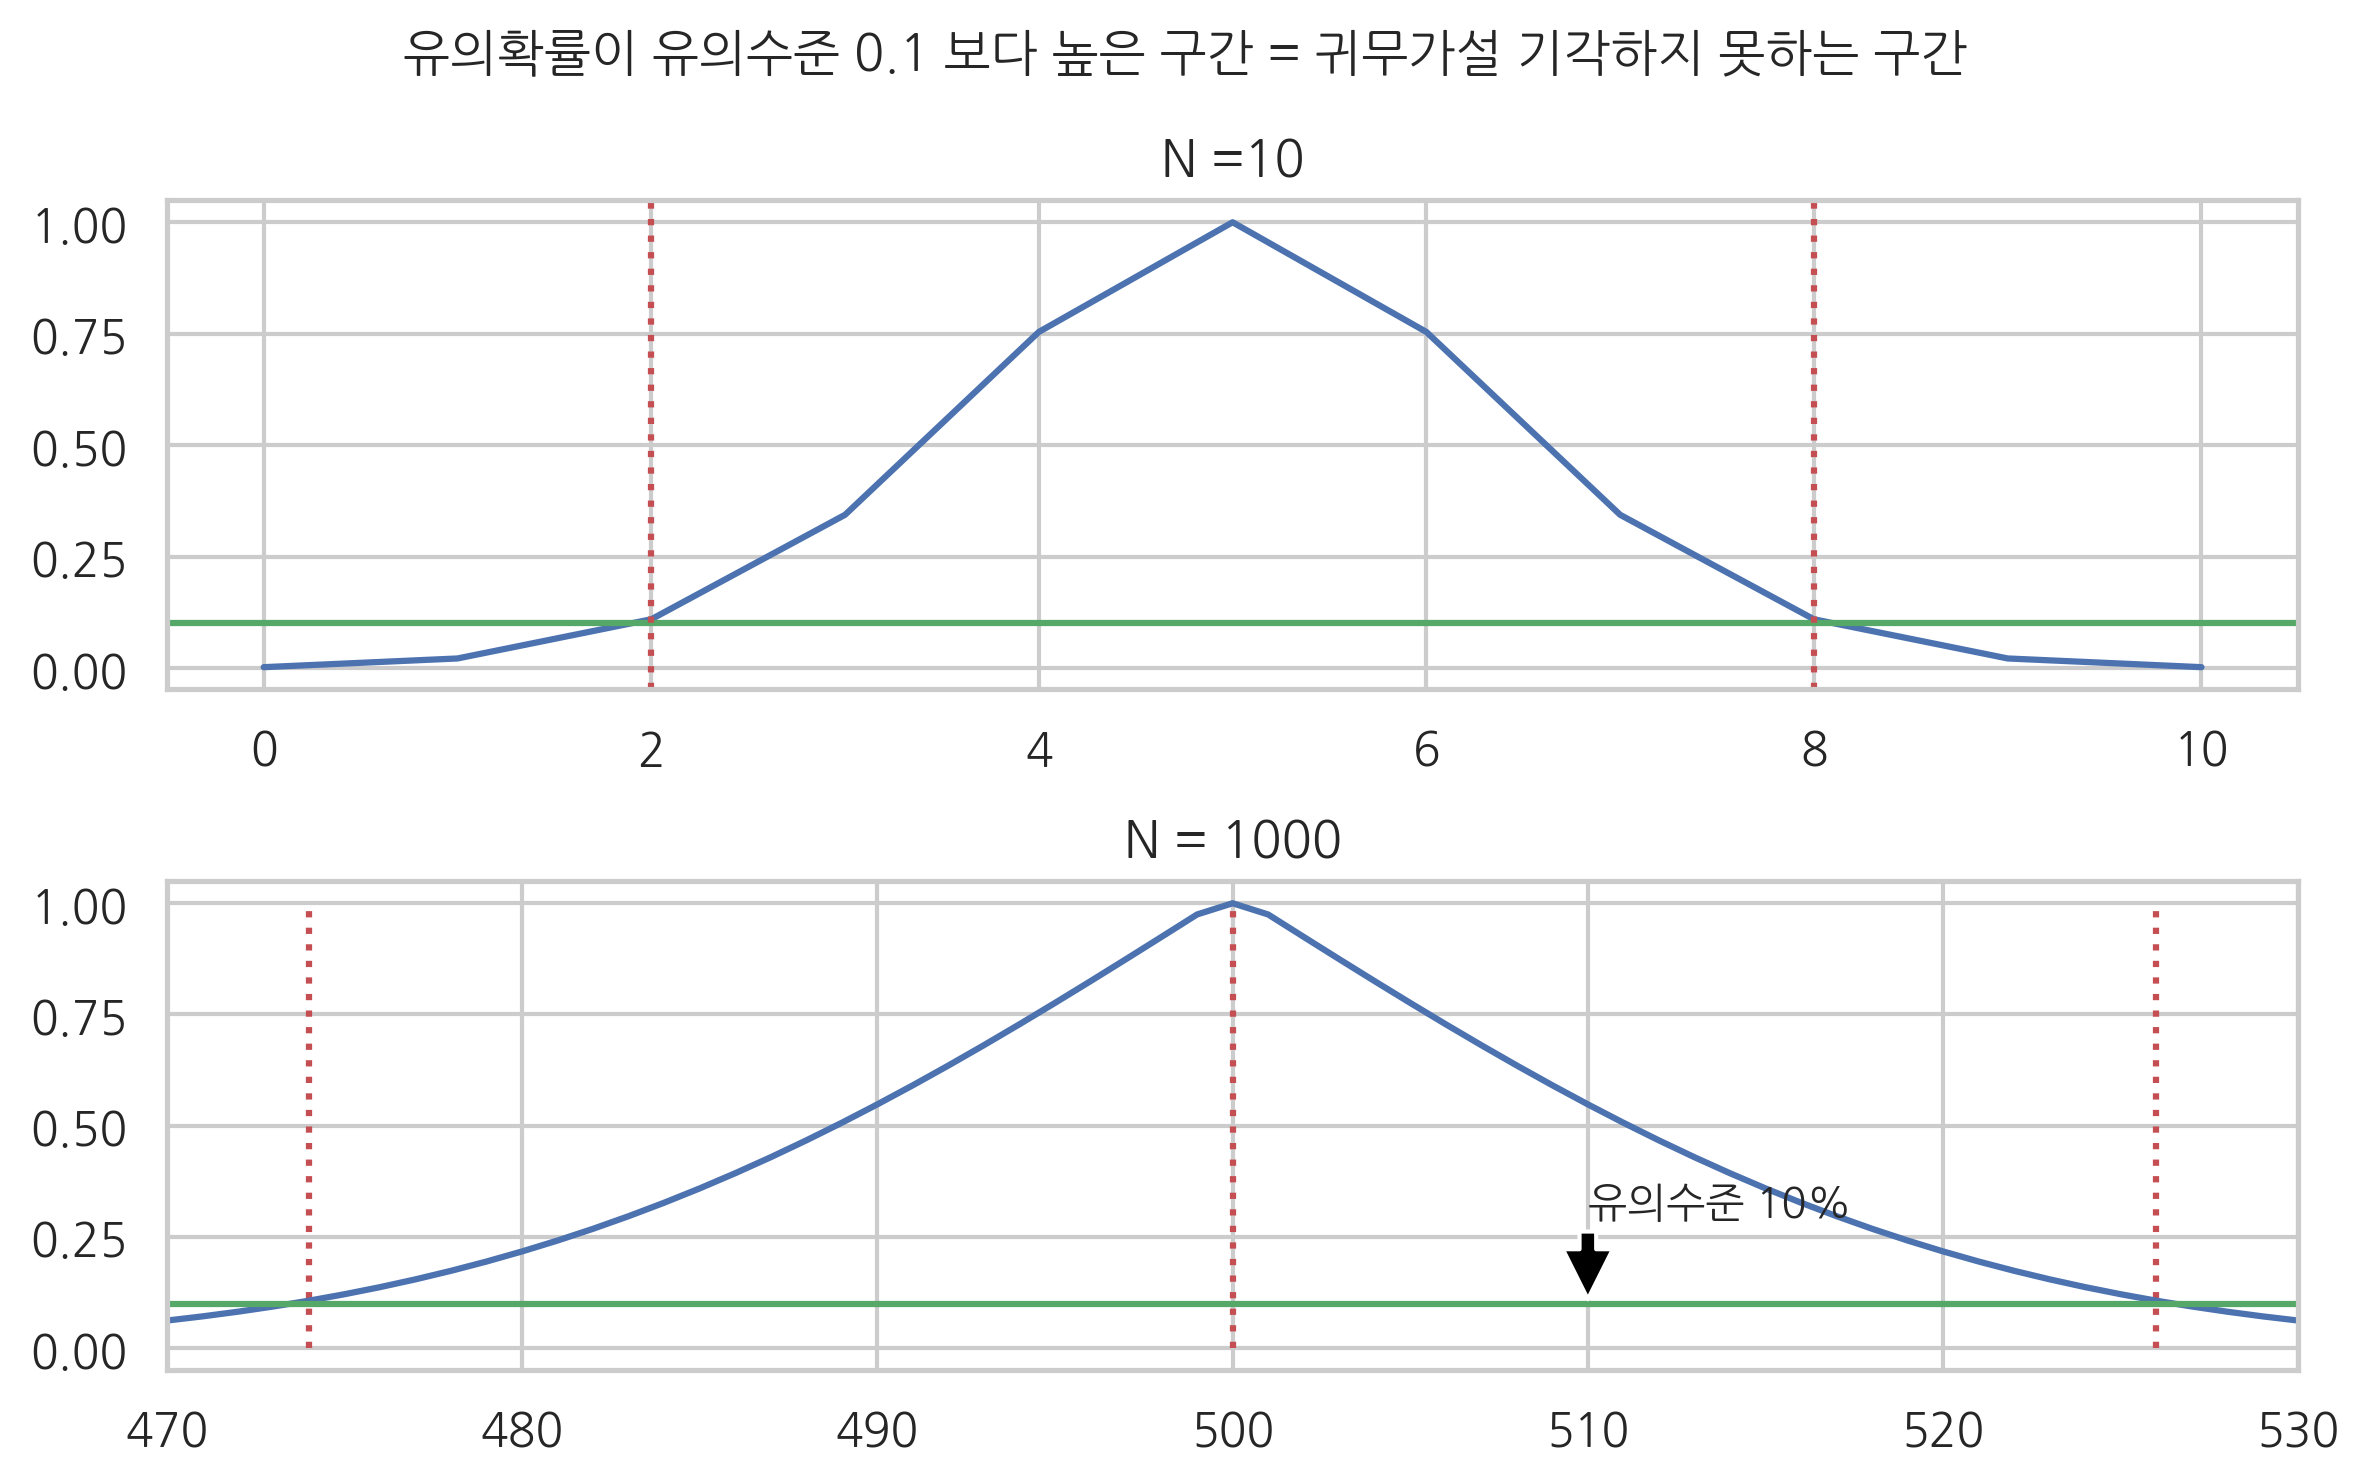

In [100]:
# 2. 
N = 10
xx = np.linspace(0, 10, 11)
plt.subplot(211)
p_values = np.array([sp.stats.binom_test(x, N) for x in xx])
fair_range = np.where(p_values >= 0.1)
plt.plot(xx, p_values)
plt.axhline(0.1, c='g')
plt.axvline(fair_range[0][0], ls=':', c='r')
plt.axvline(fair_range[0][-1], ls=':', c='r')
plt.title(f'N ={N}')


N = 1000
xx = np.linspace(0, 1000, 1001)
black = {'facecolor' : 'black'}

plt.subplot(212)
plt.title(f'N = {N}')
p_values = np.array([sp.stats.binom_test(x, N) for x in xx])
fair_range = np.where(p_values >= 0.1)
plt.plot(xx, p_values)
plt.axhline(0.1, c='g')
plt.vlines(500, ymin= 0, ymax=1.0, colors='r', ls=':')
plt.xlim(400,600)
plt.xlim(470, 530)
plt.annotate('유의수준 10%', xy=[510, 0.11], xytext=[510, 0.3], arrowprops=black)
plt.vlines(fair_range[0][0], ymin=0, ymax=1.0, colors='r', ls=':')
plt.vlines(fair_range[0][-1], ymin=0, ymax=1.0, colors='r', ls=':')
plt.suptitle('유의확률이 유의수준 0.1 보다 높은 구간 = 귀무가설 기각하지 못하는 구간')
plt.tight_layout()
plt.show()


In [191]:
# 9.5.2 연습문제 
tips = sns.load_dataset('tips')
tips

# 1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가? 
# 확률변수 = 여자손님 흡연 유무 (베르누이 확률변수)
# H0 : mu = 0.5 / Ha : mu < 0.5
df = tips[tips['sex'] == 'Female'][['smoker']].reset_index(drop=True)
print(df['smoker'].value_counts())

p_value = sp.stats.binom_test(33, len(df.values), alternative='less')

if p_value > 0.1 : 
    print('귀무가설 기각 할 수 없다')
else : 
    print('귀무가설 기각')
print(f'유의확률 : {p_value}')
print('비흡연자가 흡연자보다 많다고 할 수 있다')

No     54
Yes    33
Name: smoker, dtype: int64
귀무가설 기각
유의확률 : 0.015709055116923068
비흡연자가 흡연자보다 많다고 할 수 있다


In [190]:
# 2. 저녁에 오는 여자손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가? 
# 확률변수 : 저녁에 오는 여자손님 중 흡연유무
# 귀무가설, 대립가설 똑같다. 
df2 = tips[tips['time'] == 'Dinner']
df3 = df2[df2['sex'] == 'Female'].reset_index(drop=True)
print(df3[['smoker']].value_counts())

p_value = sp.stats.binom_test(23, len(df3['smoker'].values), alternative='less') # 유의확률

if p_value > 0.1 : 
    print('귀무가설 채택')
else : 
    print('귀무가설 기각')
print(f'유의확률 : {p_value}')
print(f'비흡연자가 흡연자보다 많다고 할 수 없다(증거가 부족하다)')


smoker
No        29
Yes       23
dtype: int64
귀무가설 채택
유의확률 : 0.2442278346899461
비흡연자가 흡연자보다 많다고 할 수 없다(증거가 부족하다)


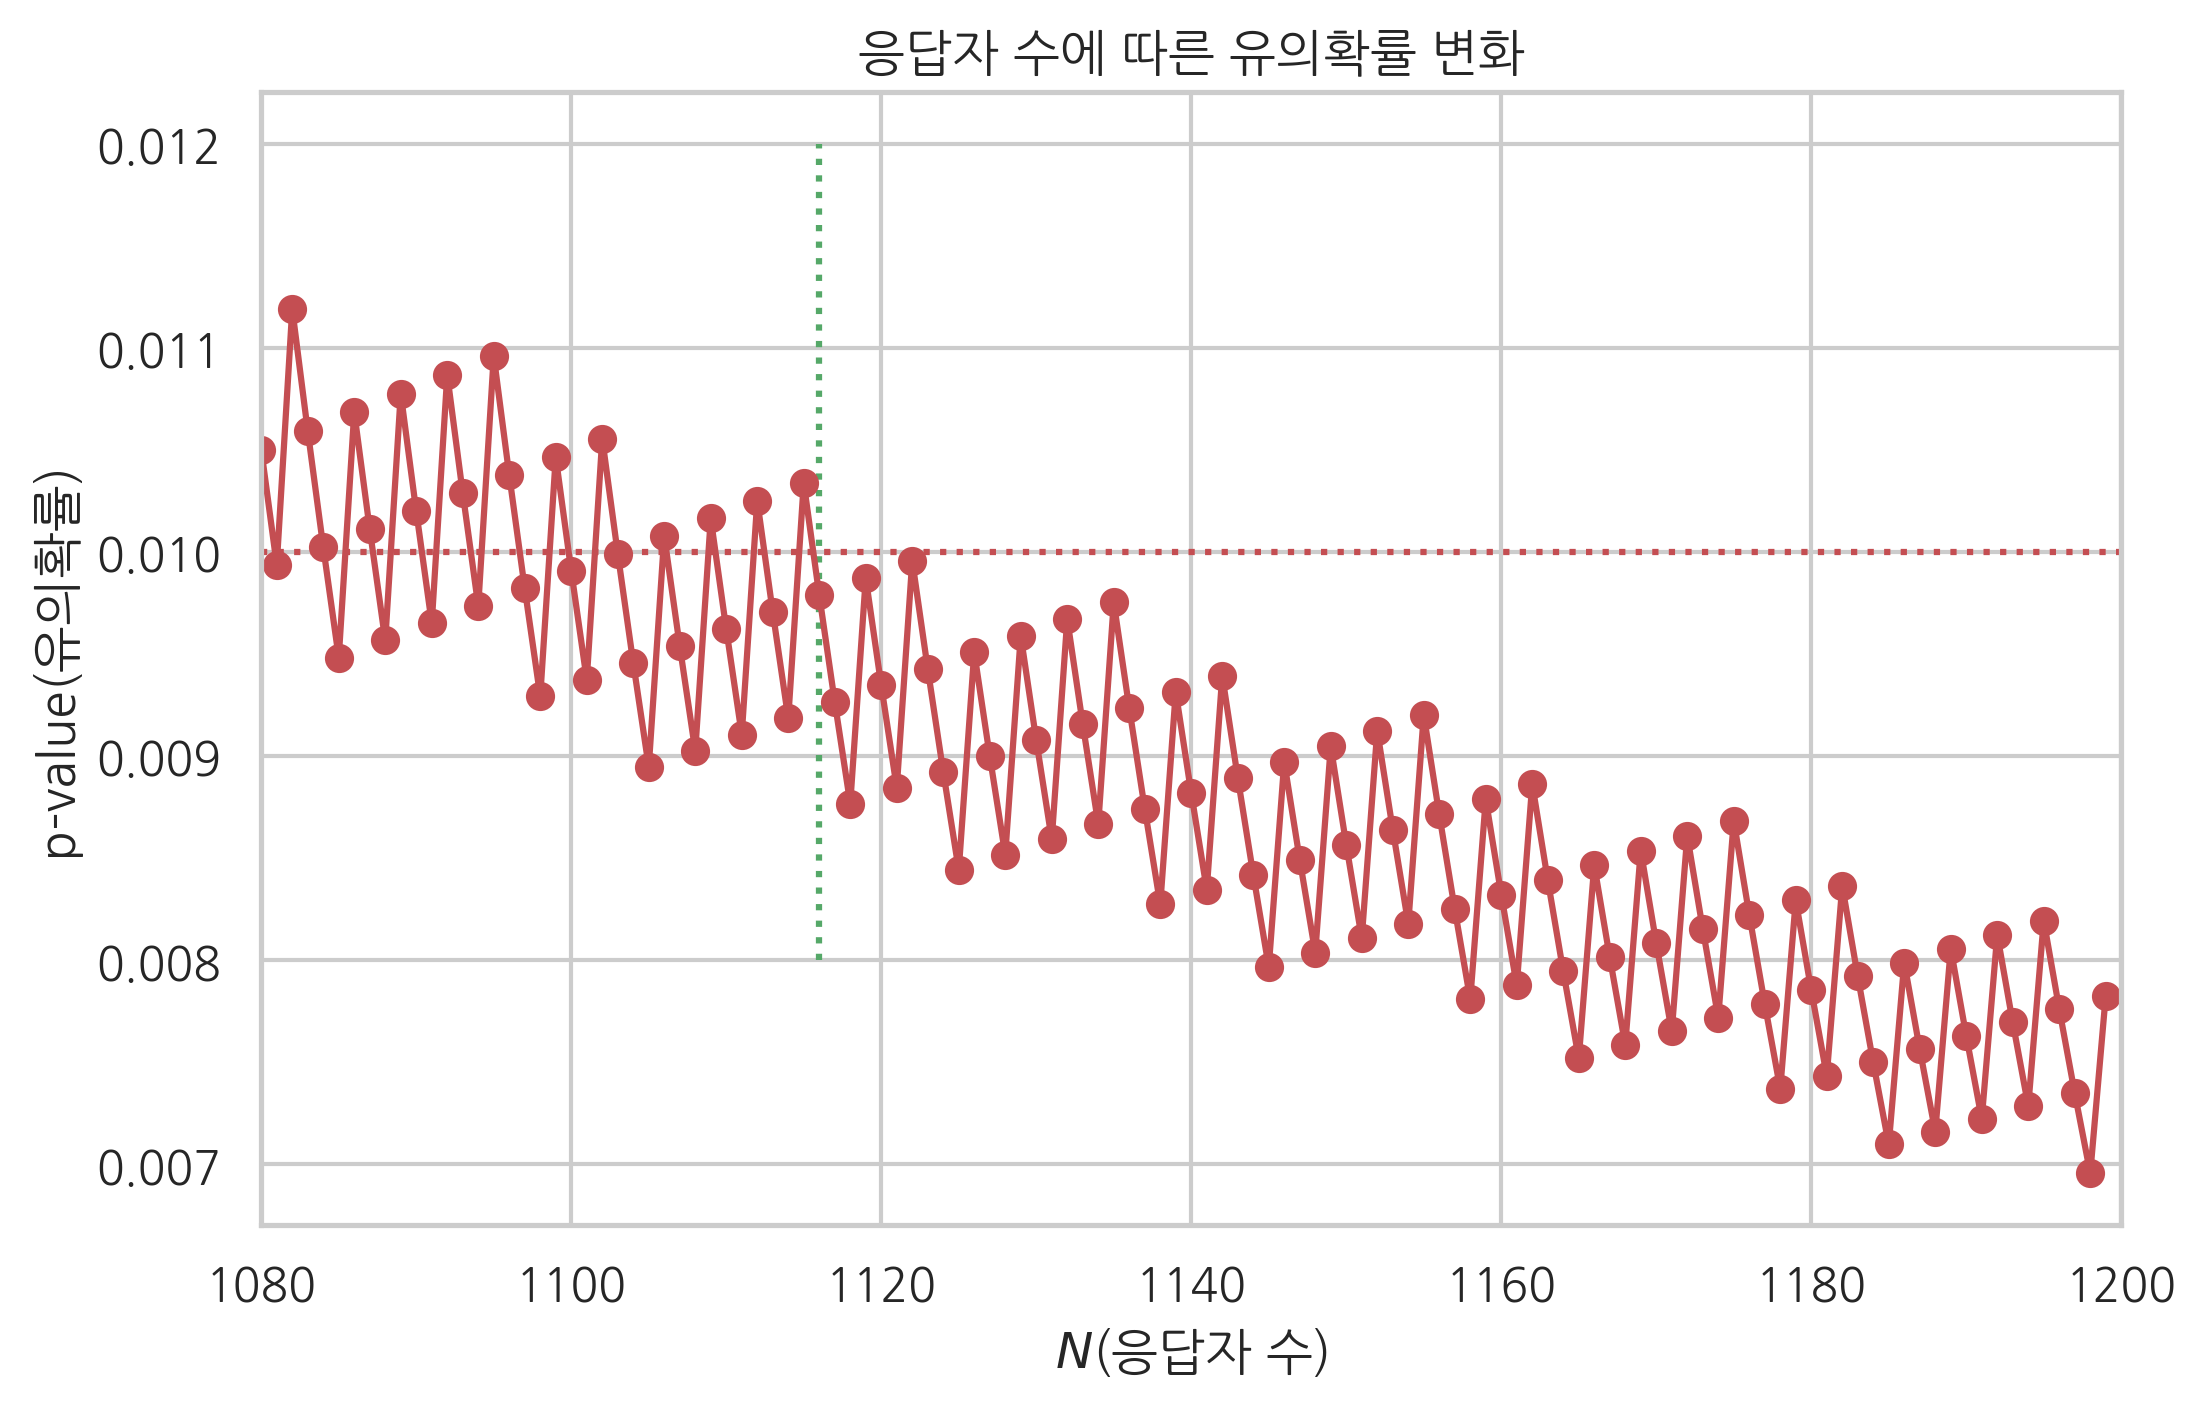

In [259]:
# 9.5.3 연습문제 
# H0 : mu = 2/3 | Ha : mu > 2/3

N_scope = np.arange(1080,1200, 1)
p_values = [sp.stats.binom_test(int(np.round(N*0.7)), N, p=2/3, alternative='greater') for N in N_scope]

plt.plot(N_scope, p_values, 'ro-')
plt.axhline(0.01, ls=':', c='r')
plt.xlim(1080,1200)
plt.xlabel('$N$(응답자 수)')
plt.ylabel('p-value(유의확률)')


plt.vlines(1116, ymin=0.008, ymax=0.012, color='g', ls=':')
plt.title('응답자 수에 따른 유의확률 변화')
plt.show()

In [262]:
# 9.5.4 연습문제 
N = 5
n = [0,0,0,0,0,5]

p_value = sp.stats.chisquare(n)[1]

print(f'유의확률 : {p_value}')

유의확률 : 0.00013933379118562602


In [263]:
# 9.5.5 연습문제 
# 카이제곱 독립검정

obs = np.array([[4,16,20],[23,18,19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

Z통계량 (검정통계량) : 2.3338341854824276
양측검정 유의확률 : 0.0196
귀무가설 기각


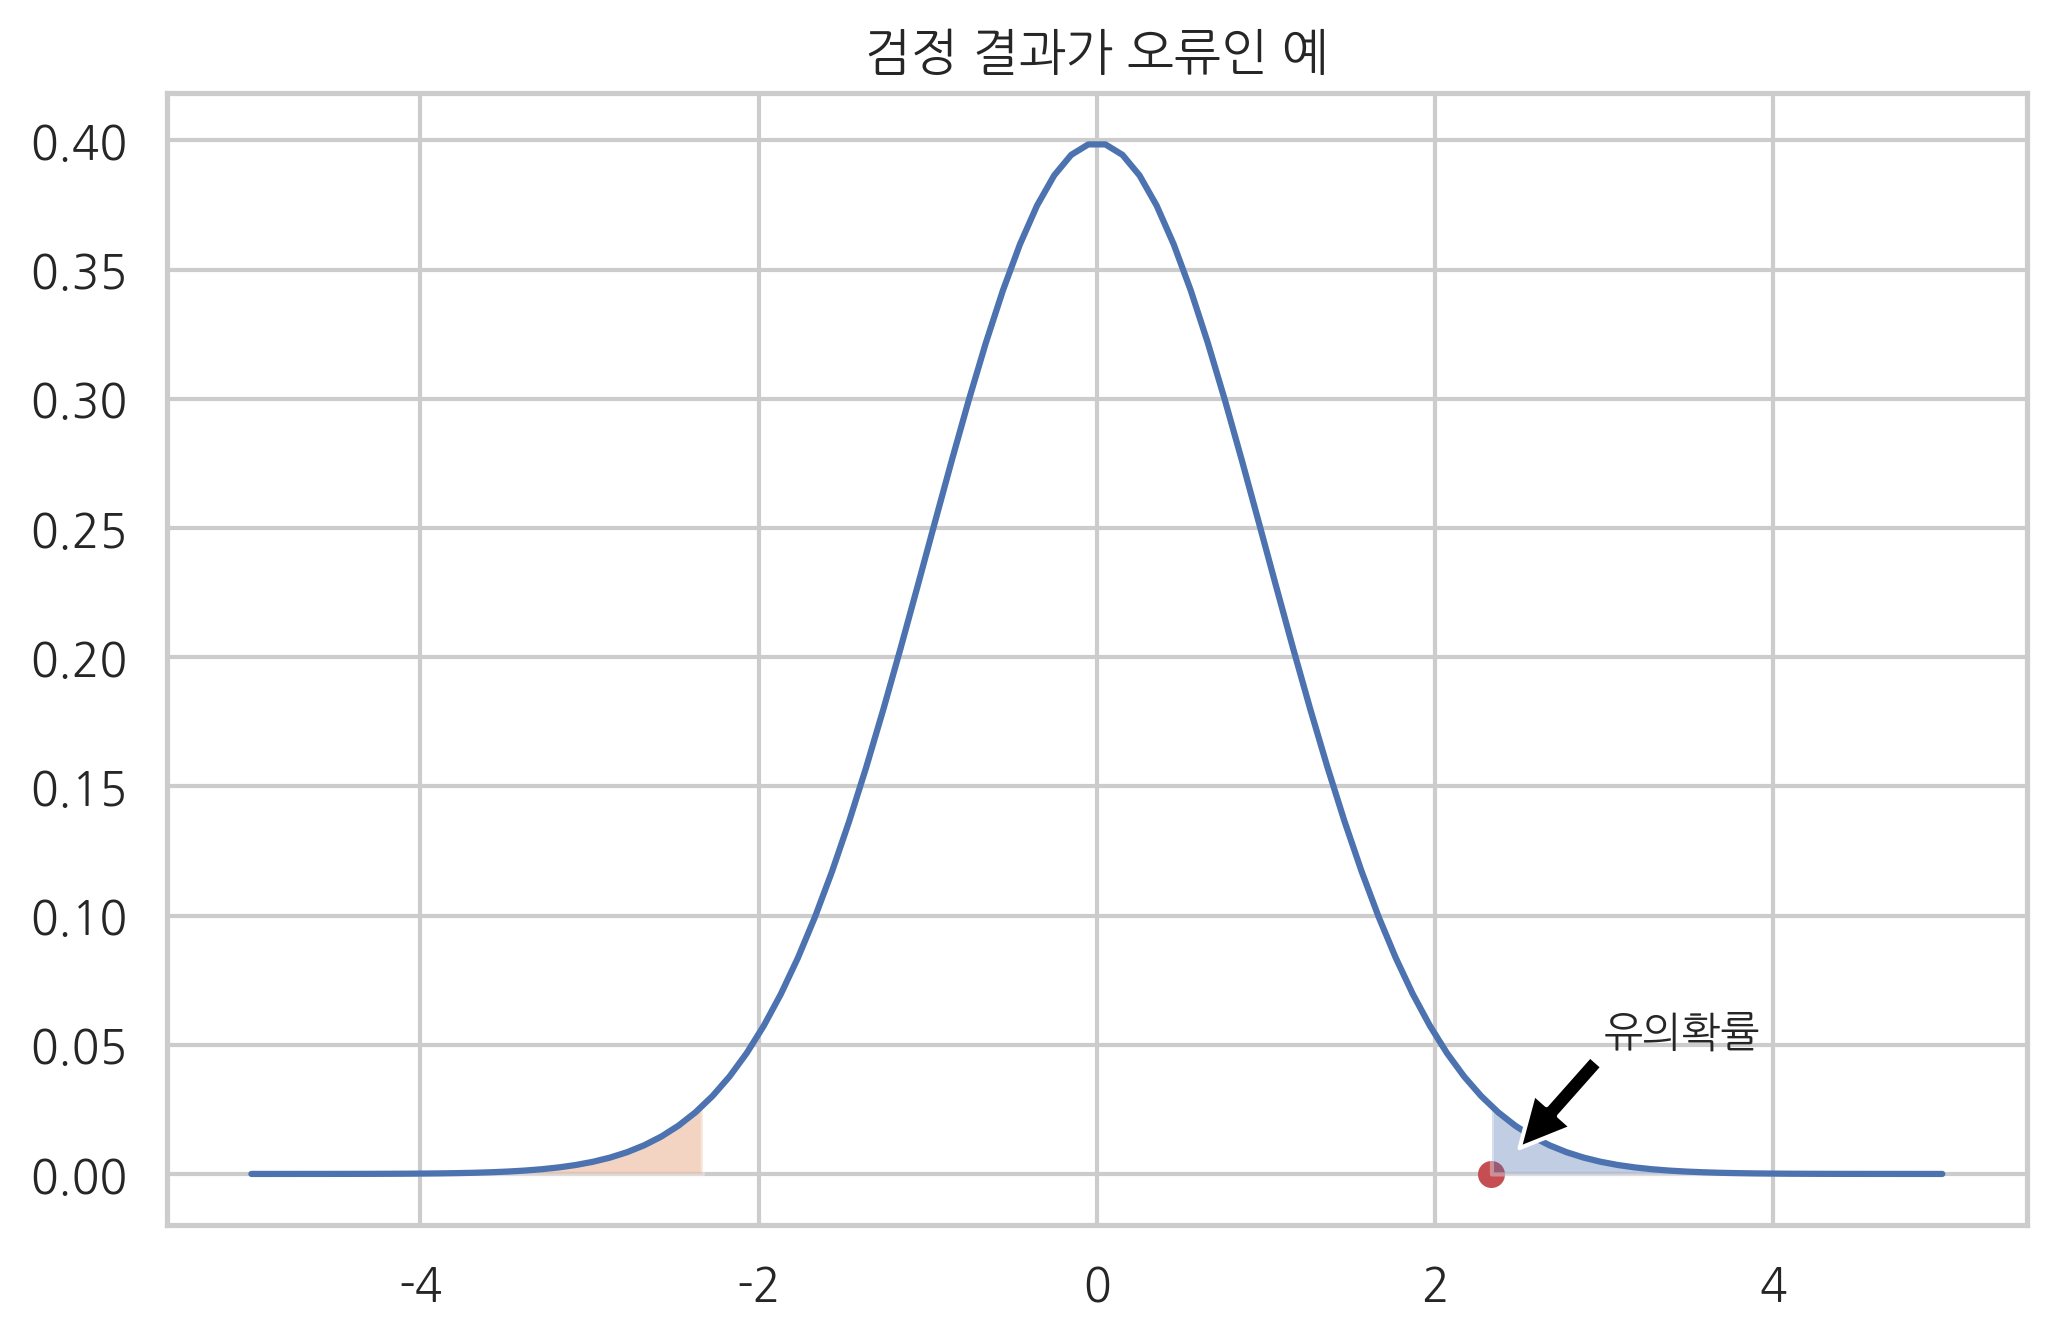

In [302]:
# 단일표본 Z 검정 
# sigma2를 아는 경우 

N = 10
black = {'facecolor' : 'black'}

np.random.seed(0)
rv = sp.stats.norm(loc=0, scale=1)
sample = rv.rvs(N)

Z = np.mean(sample)/(1/np.sqrt(N)) # Z 통계량값

xx = np.linspace(-5,5,100)
plt.plot(xx, rv.pdf(xx))

plt.scatter(Z,0, 30, c='r')

xx2 = np.linspace(Z, 5, 100)
plt.fill_between(xx2, rv.pdf(xx2), alpha=0.35)
xx3 = np.linspace(-5, -Z, 100)
plt.fill_between(xx3, rv.pdf(xx3), alpha=0.35)
plt.annotate('유의확률', xy=[2.5, 0.01], xytext=[3, 0.05], arrowprops=black)

result = (1-rv.cdf(Z))*2

print(f'Z통계량 (검정통계량) : {Z}')
print(f'양측검정 유의확률 : {np.round(result,5)}')
print('귀무가설 기각')

plt.title('검정 결과가 오류인 예')
plt.show()

In [314]:
# 단일표본 t 검정

N = 10
mu_0 = 0

x = sp.stats.norm(mu_0).rvs(N, random_state=0)
result = sp.stats.ttest_1samp(x, popmean=0) # 단일표본 t 검정
print(f'유의확률 : {result[1]}')
print('5% 유의수준에서 귀무가설 기각')
print('데이터 부족으로 1종오류 발생')
print('-'*100)

N = 100 
mu_0 = 0
x = sp.stats.norm(mu_0).rvs(N, random_state=0) # 100개 표본
result = sp.stats.ttest_1samp(x, popmean=0) # 단일표본 t 검정
print(f'유의확률 : {result[1]}')
print(f'5% 유의수준에서 귀무가설 기각 할 수 없다')


유의확률 : 0.04781846490857058
5% 유의수준에서 귀무가설 기각
데이터 부족으로 1종오류 발생
----------------------------------------------------------------------------------------------------
유의확률 : 0.5562489158694675
5% 유의수준에서 귀무가설 기각 할 수 없다


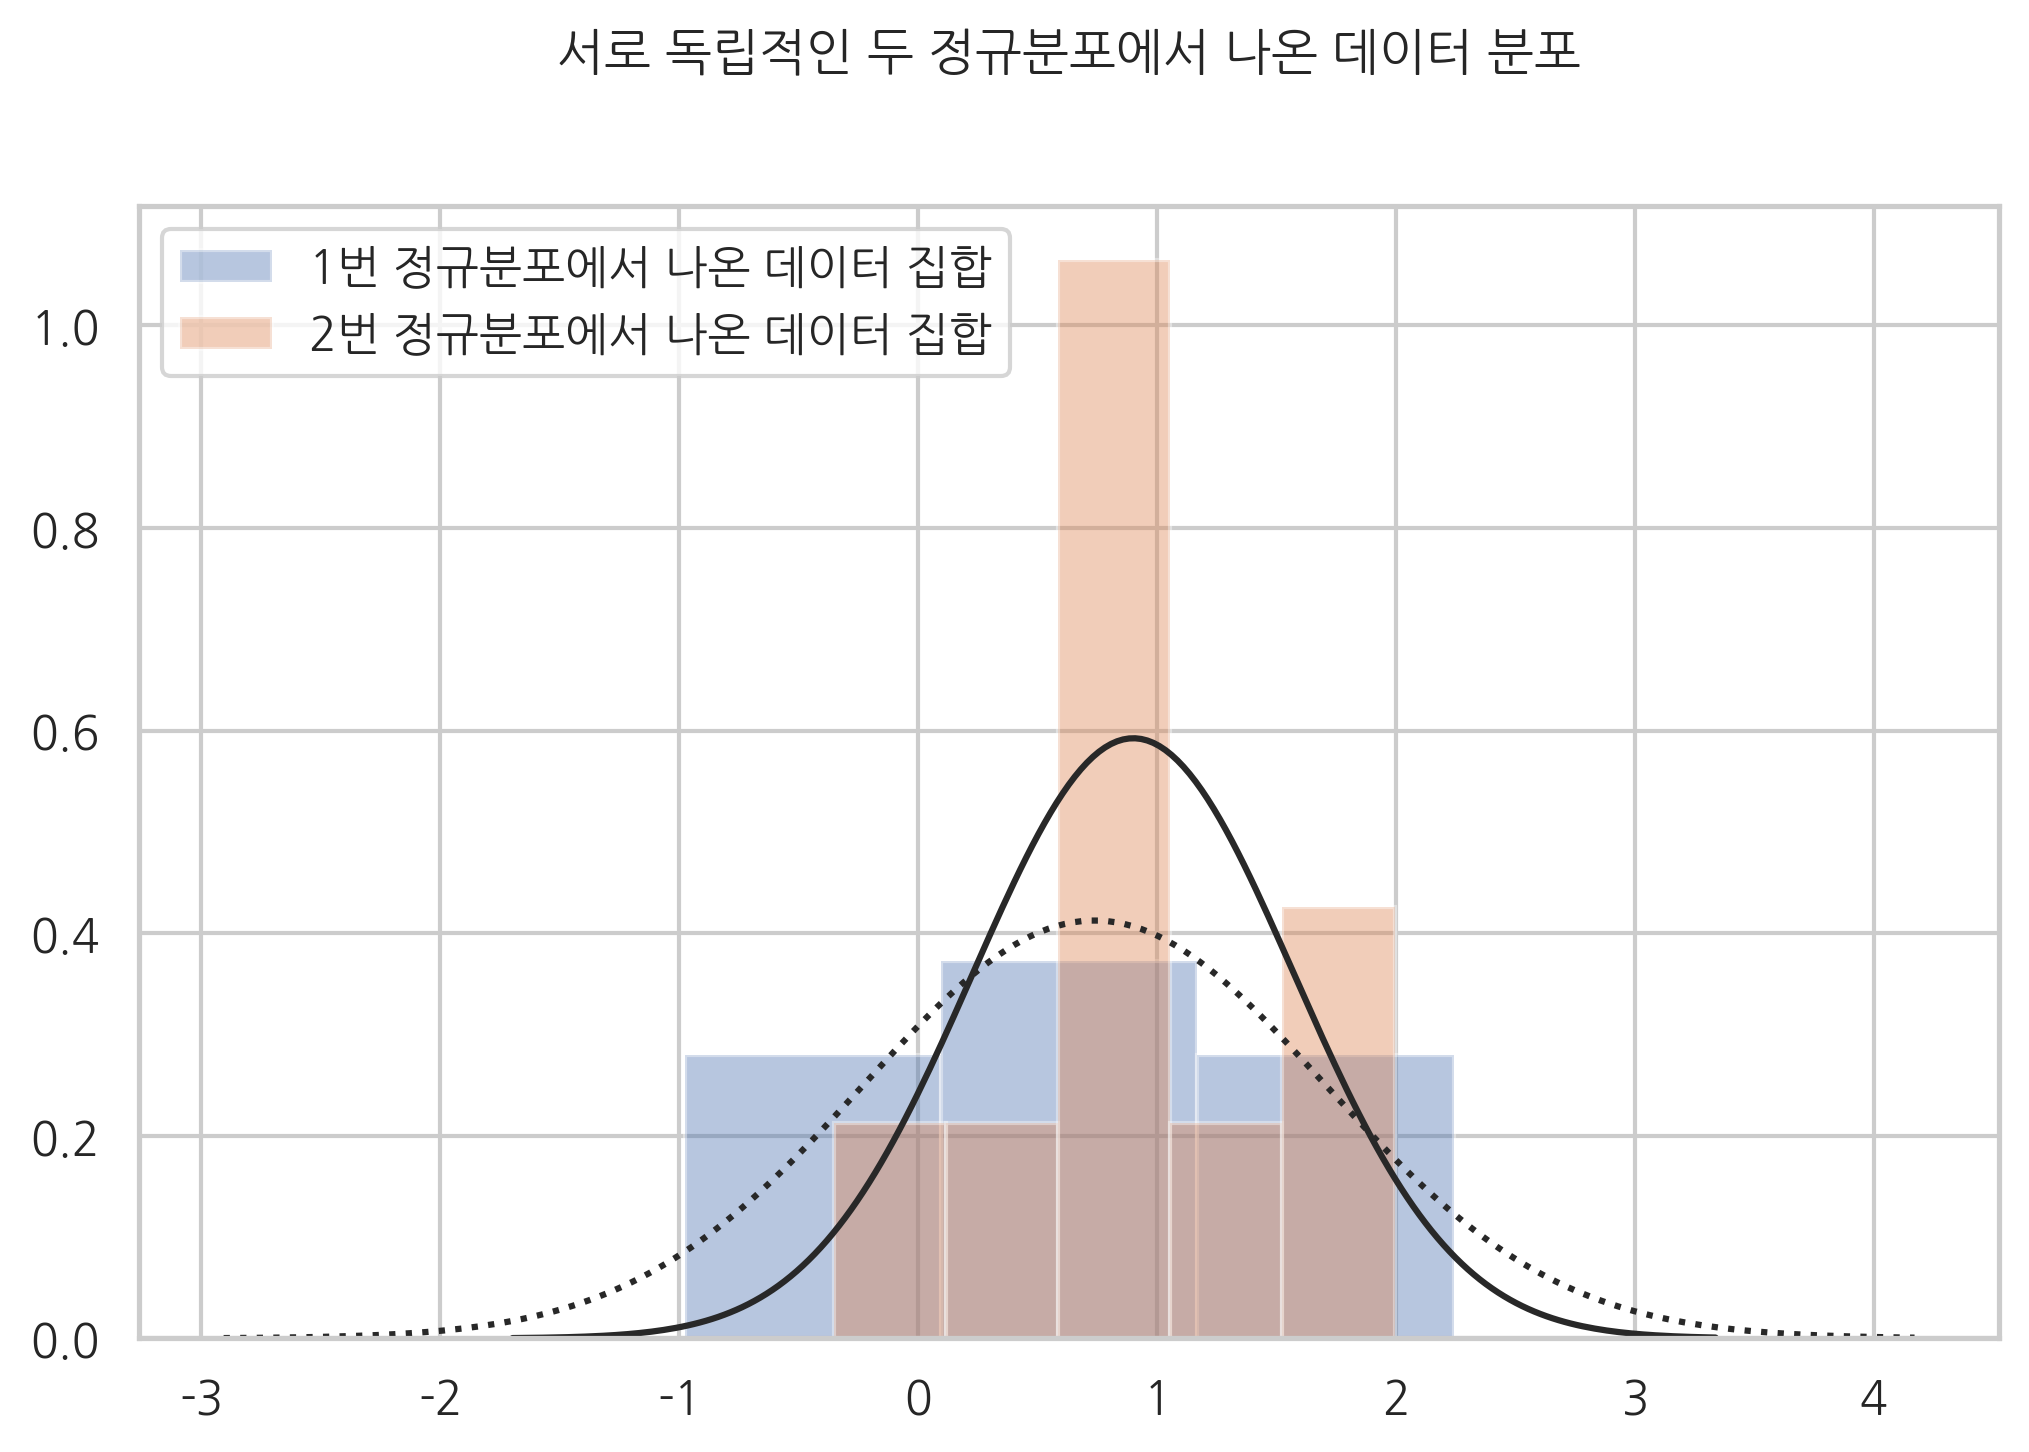

유의확률 : 0.6843504889824326
귀무가설 기각 못한다 (2종오류 발생)


In [324]:
# 독립표본 t 검정
# 서로 독립인 두 정규분포 기댓값이 같은지 검사 

N_1 = 10
mu_1 = 0
sigma_1 = 1

N_2 = 10
mu_2 = 0.5
sigma_2 = 1

np.random.seed(0)

rv1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
rv2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

ax = sns.distplot(rv1, kde=False, fit=sp.stats.norm, label='1번 정규분포에서 나온 데이터 집합')
ax = sns.distplot(rv2, kde=False, fit=sp.stats.norm, label='2번 정규분포에서 나온 데이터 집합')
ax.lines[0].set_linestyle(':')
plt.legend()
plt.title('서로 독립적인 두 정규분포에서 나온 데이터 분포', y=1.1)
plt.show()

p = sp.stats.ttest_ind(rv1, rv2, equal_var=False)[1]
print(f'유의확률 : {p}')
print(f'귀무가설 기각 못한다 (2종오류 발생)')

In [331]:
# 위 사례에서 2종 오류 피하기 위해 데이터 수를 늘릴 경우 

N_1 = 50
mu_1 = 0
sigma_1 = 1

N_2 = 100
mu_2 = 0.5
sigma_2 = 1

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2) # 서로 독립적인 두 정규분포에서 나온 표본들

result = sp.stats.ttest_ind(x1, x2, equal_var=False)
print(f'유의확률 : {result[1]}')
print(f'귀무가설 기각, 대립가설 채택 : 2종 오류 발생 없음')
print(f'$\mu_{1} != \mu_{2}$')

유의확률 : 0.012800307550312669
귀무가설 기각, 대립가설 채택 : 2종 오류 발생 없음
$\mu_1 != \mu_2$


In [339]:
# 9.5.6 연습문제 
# h0 : mu1=mu2 / ha : mu1 > mu2

# 서로 독립인 두 정규분포에서 나온 데이터 
x1 = [80,75, 85, 50,60,75, 45, 70, 90, 95, 85, 80]
x2 = [80,85,70,80, 35, 55, 80]

p_value = sp.stats.ttest_ind(x1, x2, equal_var=False)
print(f'유의확률 : {p_value[1]}')
print(f'유의수준보다 높다')
print(f'귀무가설 기각 못한다 = 귀무가설 채택. = 1반 실력과 2반 실력은 같다')

유의확률 : 0.562790180213766
유의수준보다 높다
귀무가설 기각 못한다 = 귀무가설 채택. = 1반 실력과 2반 실력은 같다


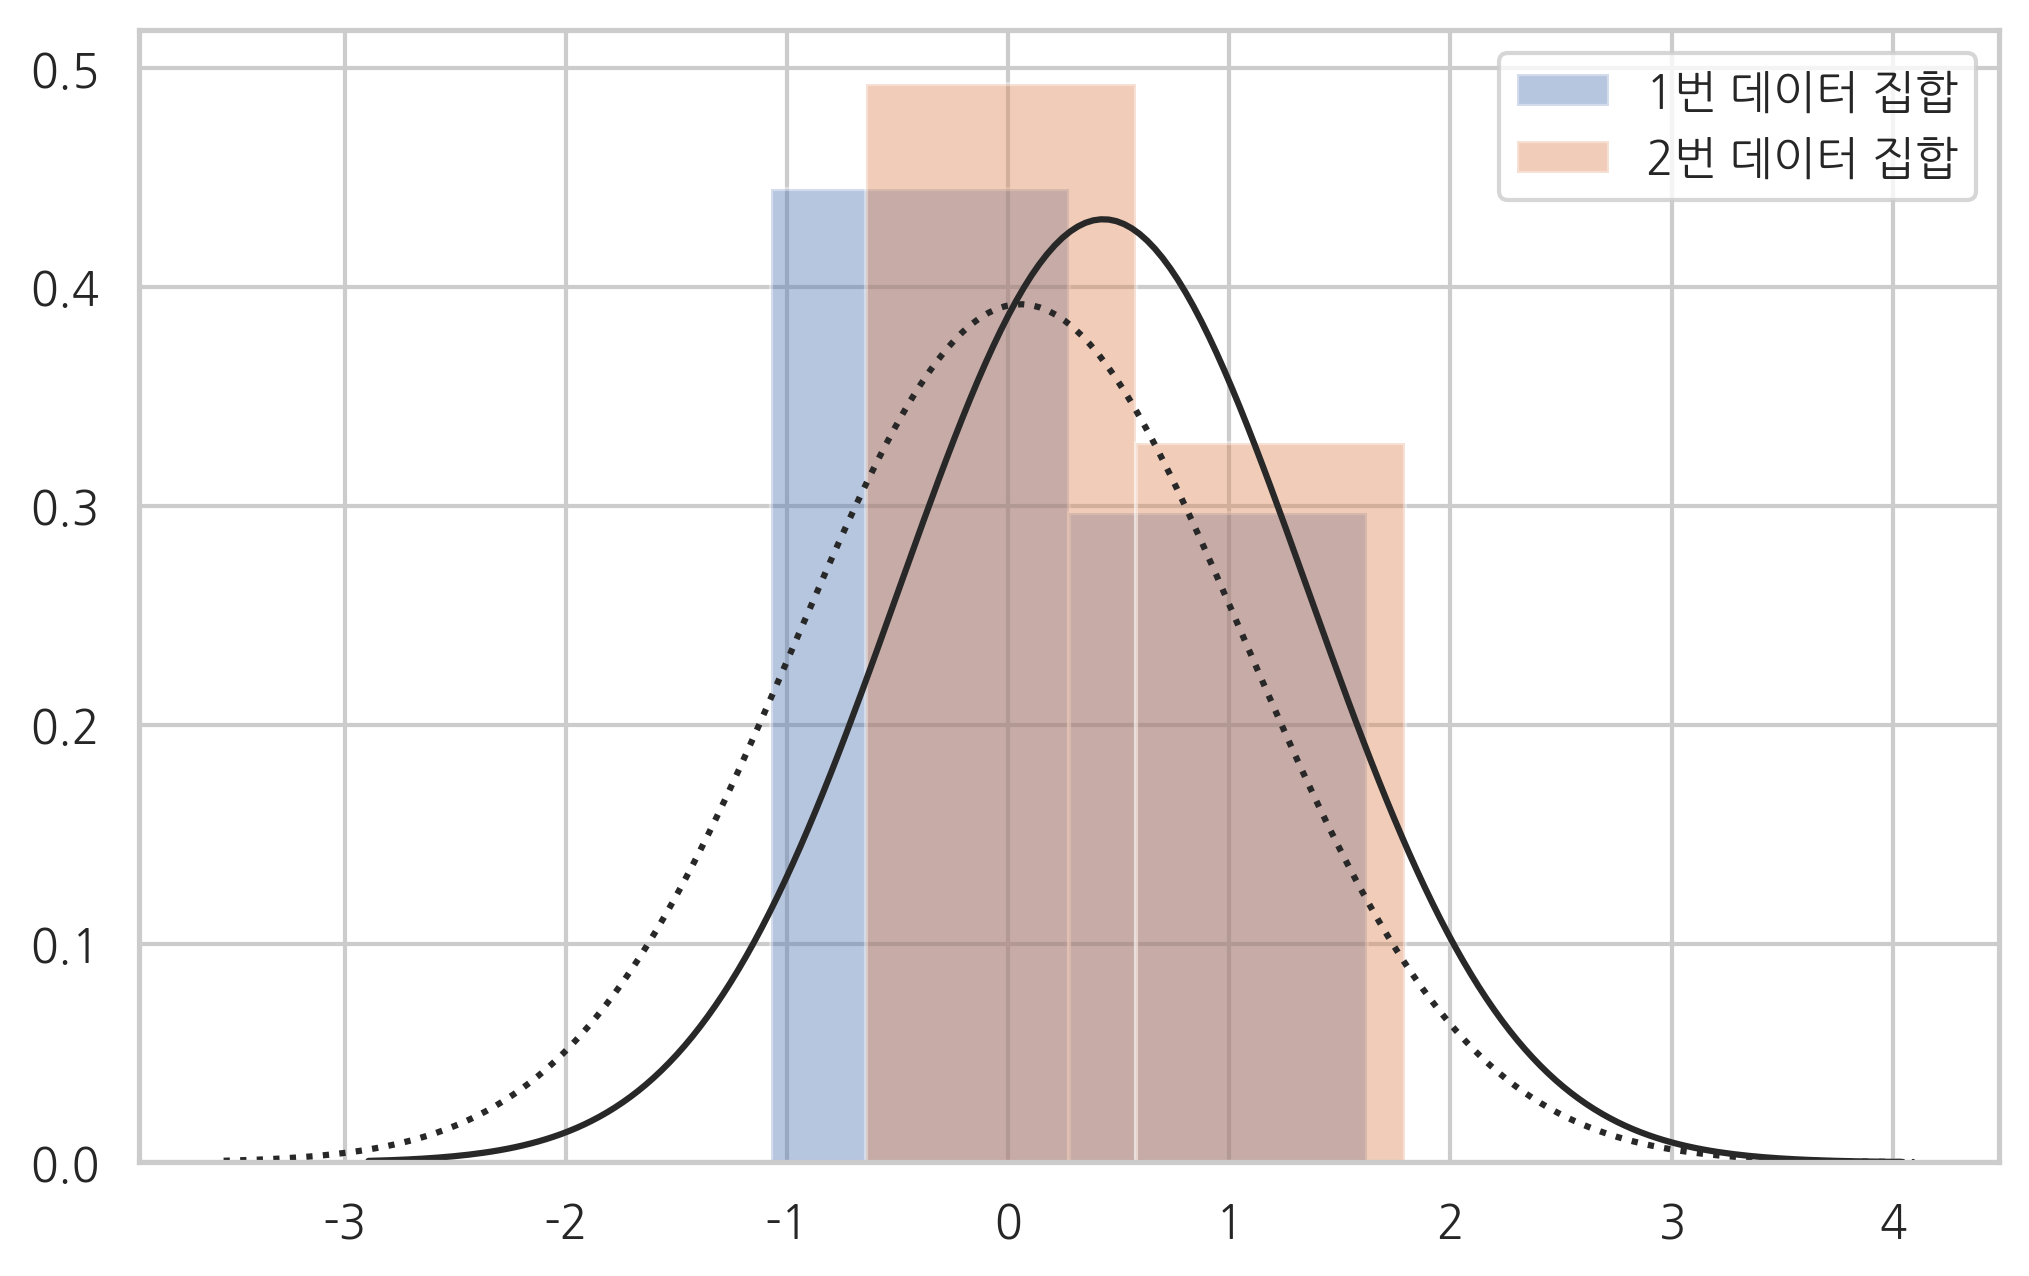

유의확률 : 0.0047953456833781305


In [373]:
# 대응표본 t 검정
N = 5
mu_1 = 0
mu_2 = 0.4

np.random.seed(1)

x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N) # 기댓값 약 0.4 인 정규분포에서 나온 5개 표본

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 집합')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 집합')

ax.lines[0].set_linestyle(':')
plt.legend()
plt.show()

p_value = sp.stats.ttest_rel(x1, x2)[1]
print(f'유의확률 : {p_value}')

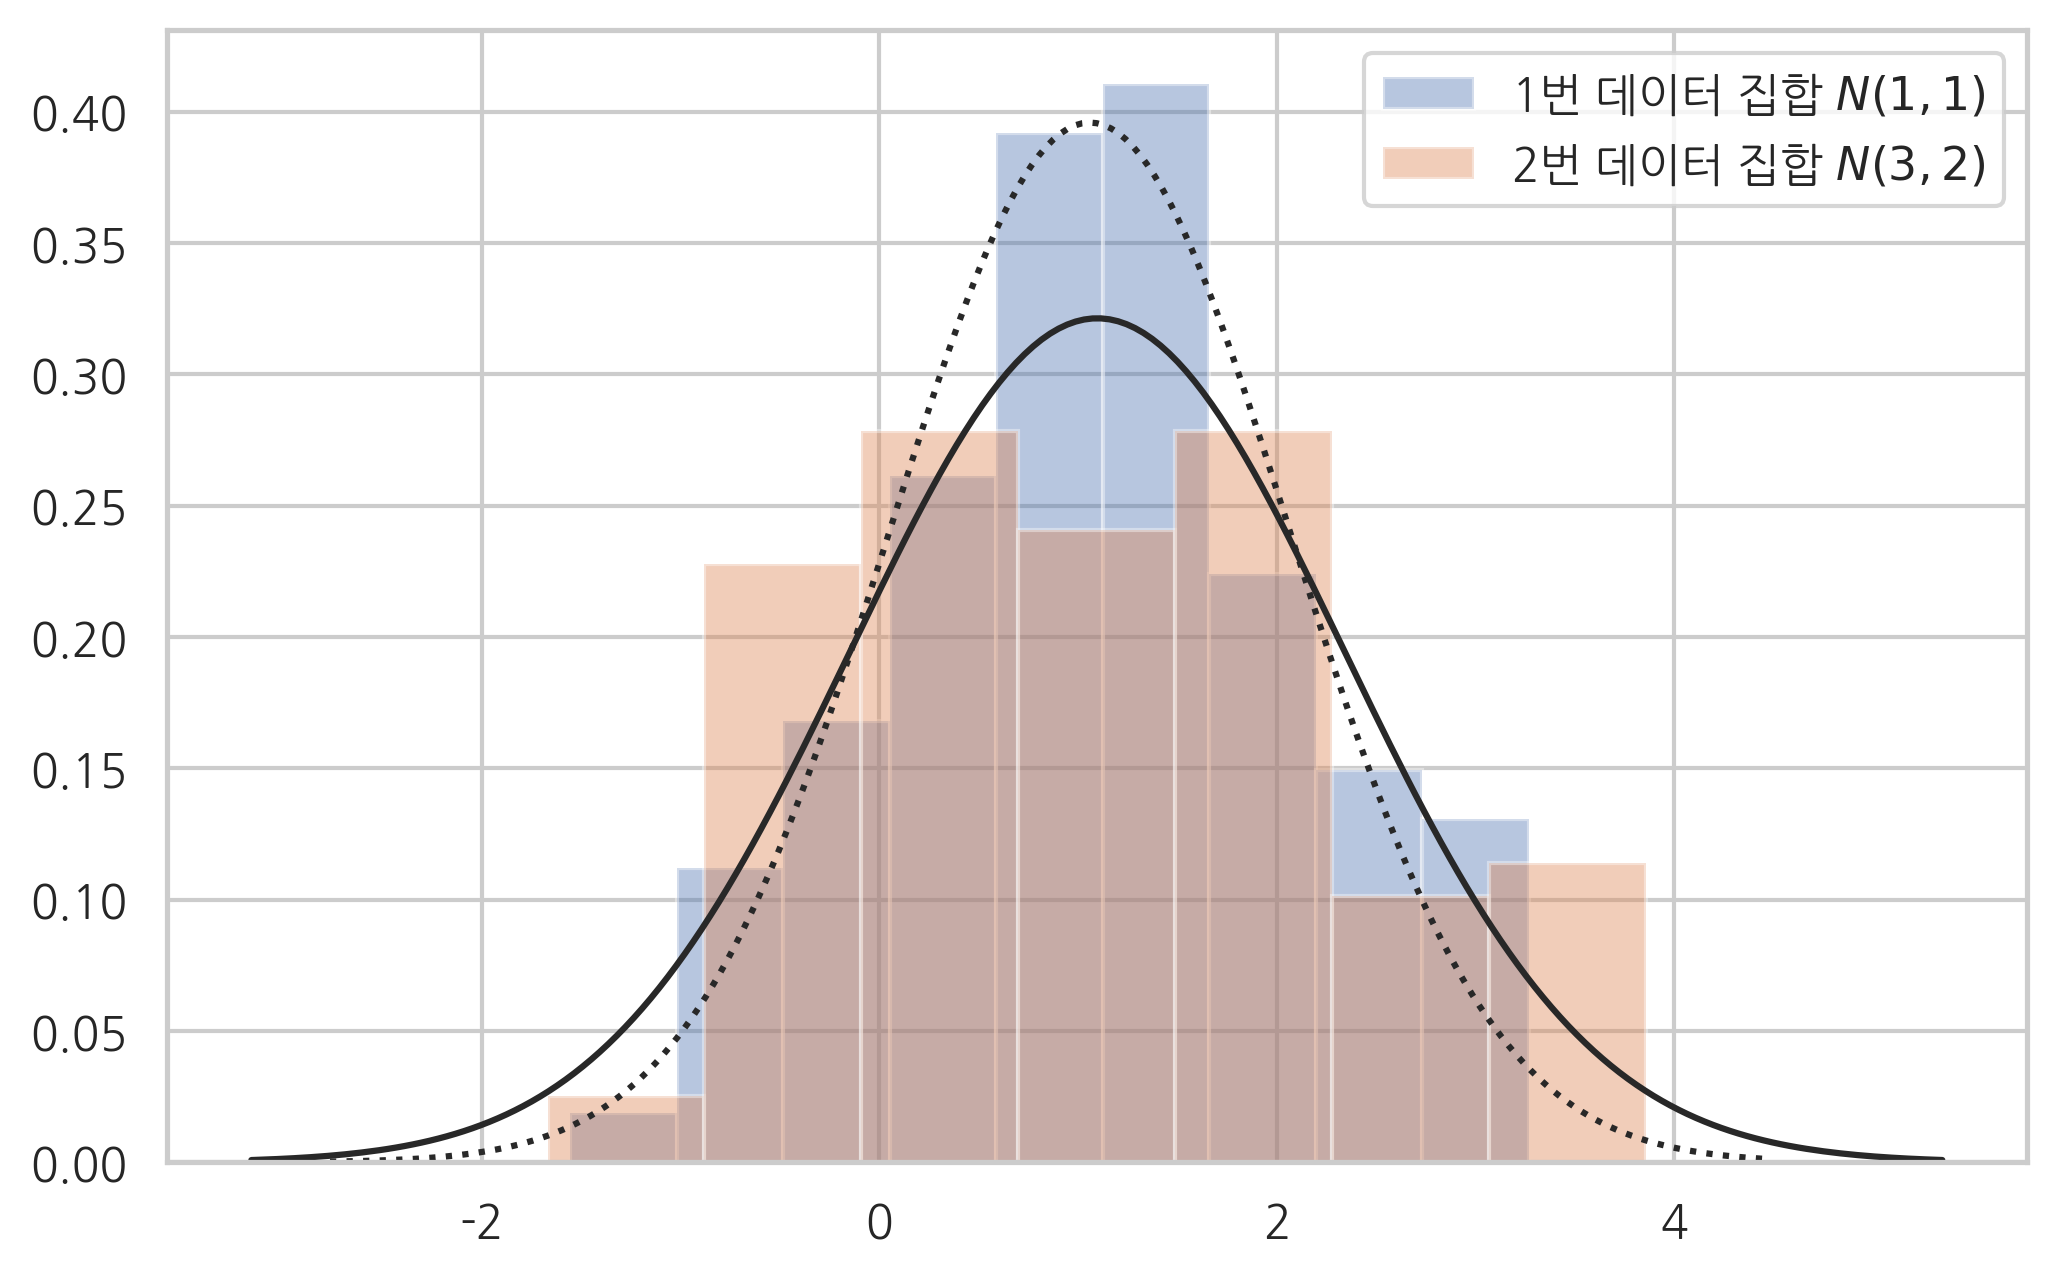

In [392]:
# 등분산 검정 
# 독립표본 t검정에 선행해서 해야 한다. 
# 서로 독립인 두 정규분포 분산이 같은지 검사 하는 검정이다. 

N1 = 100
N2 = 100
sigma1 = 1
sigma2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(1, sigma1).rvs(N1)
x2 = sp.stats.norm(1, sigma2).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 집합 $N(1, 1)$')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 집합 $N(3,2)$')
ax.lines[0].set_linestyle(':')
plt.legend()
plt.show()

In [393]:
# bartlett 등분산 검정
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [394]:
# fligner 등분산 검정
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224844116487668, pvalue=0.007190141591048263)

In [395]:
# levene 등분산 검정
sp.stats.levene(x1,x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

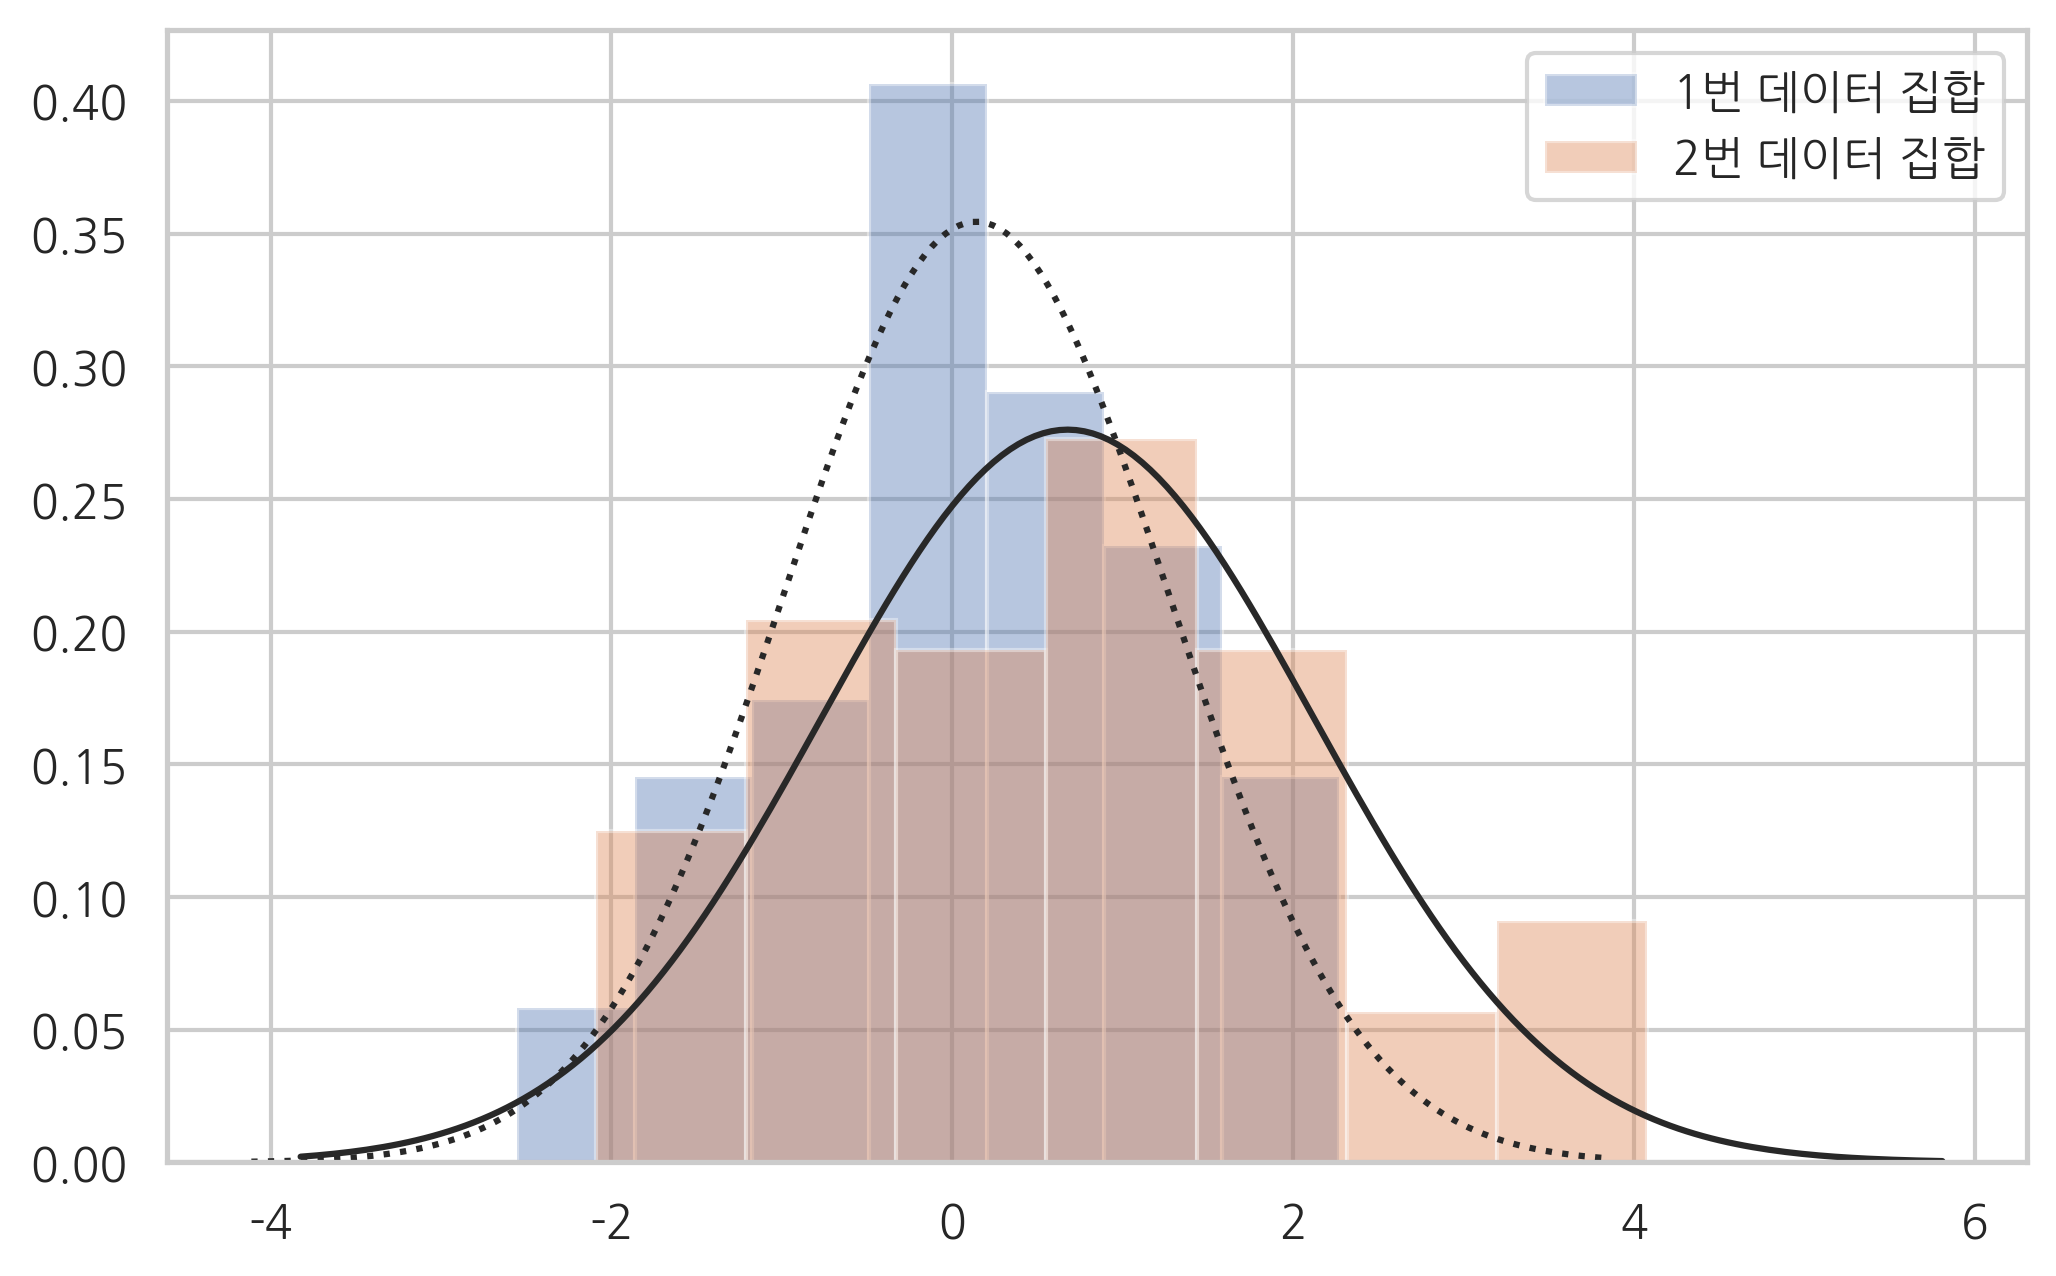

유의확률 : 0.05550723364321564
10% 유의수준에서 귀무가설 기각, 두 데이터가 나온 분포는 다른 분포다.


In [5]:
# 정규성 검정 
# 데이터가 정규분포에서 나왔는지 검정
# 확률분포가 정규분포 따르는지 검사

# 콜모고로프-스미르노프 검정 : 두 데이터 집합이 같은 분포에서 나왔는지 검사

np.random.seed(0)
N1 = 50 
N2 = 100

x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 집합')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 집합')
ax.lines[0].set_linestyle(':')
plt.legend()
plt.show()

##
result = sp.stats.ks_2samp(x1, x2)
print(f'유의확률 : {result[1]}')
print(f'10% 유의수준에서 귀무가설 기각, 두 데이터가 나온 분포는 다른 분포다.')